#1° Problema de Negócio

O projeto consiste no desenvolvimento de uma máquina preditiva, baseada em modelos de aprendizado de máquina, capaz de identificar se uma mulher possui ou não diabetes. A análise será realizada a partir de um conjunto de fatores essenciais, amplamente reconhecidos na literatura médica, como determinantes no desenvolvimento da doença.

O objetivo do conjunto de dados é prever diagnosticamente se um paciente tem ou não diabetes, com base em certas medições diagnósticas incluídas no conjunto de dados. Várias restrições foram colocadas na seleção dessas instâncias de um banco de dados maior.

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
https://archive.ics.uci.edu/ml/machine-learning-databases/diabetes/


In [1]:
# Import dos módulos
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import uniform, loguniform, randint
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carregando os dados
arquivo = '/content/Diabetes.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values
dados.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 2°  Análise Exploratória

In [3]:
# MIssing
dados.isna().sum()

,0
preg,0
plas,0
pres,0
skin,0
test,0
mass,0
pedi,0
age,0
class,0


In [4]:
#Informações do Dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Descritiva
dados.describe()


,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: ylabel='pedi'>

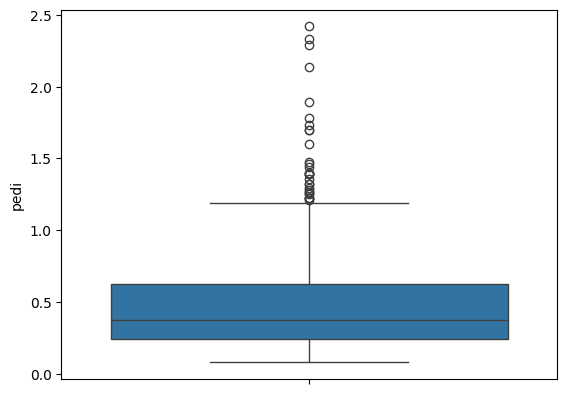

In [6]:
# Gráfico da Variável
sns.boxplot(dados.pedi)

<Axes: xlabel='test', ylabel='Count'>

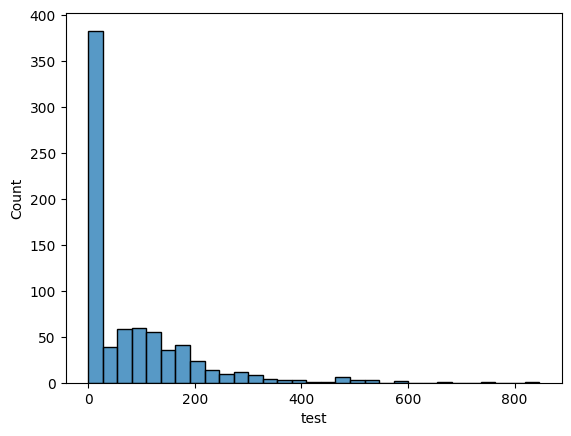

In [7]:
dados.describe()
sns.histplot(dados.test)

In [8]:
dados.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


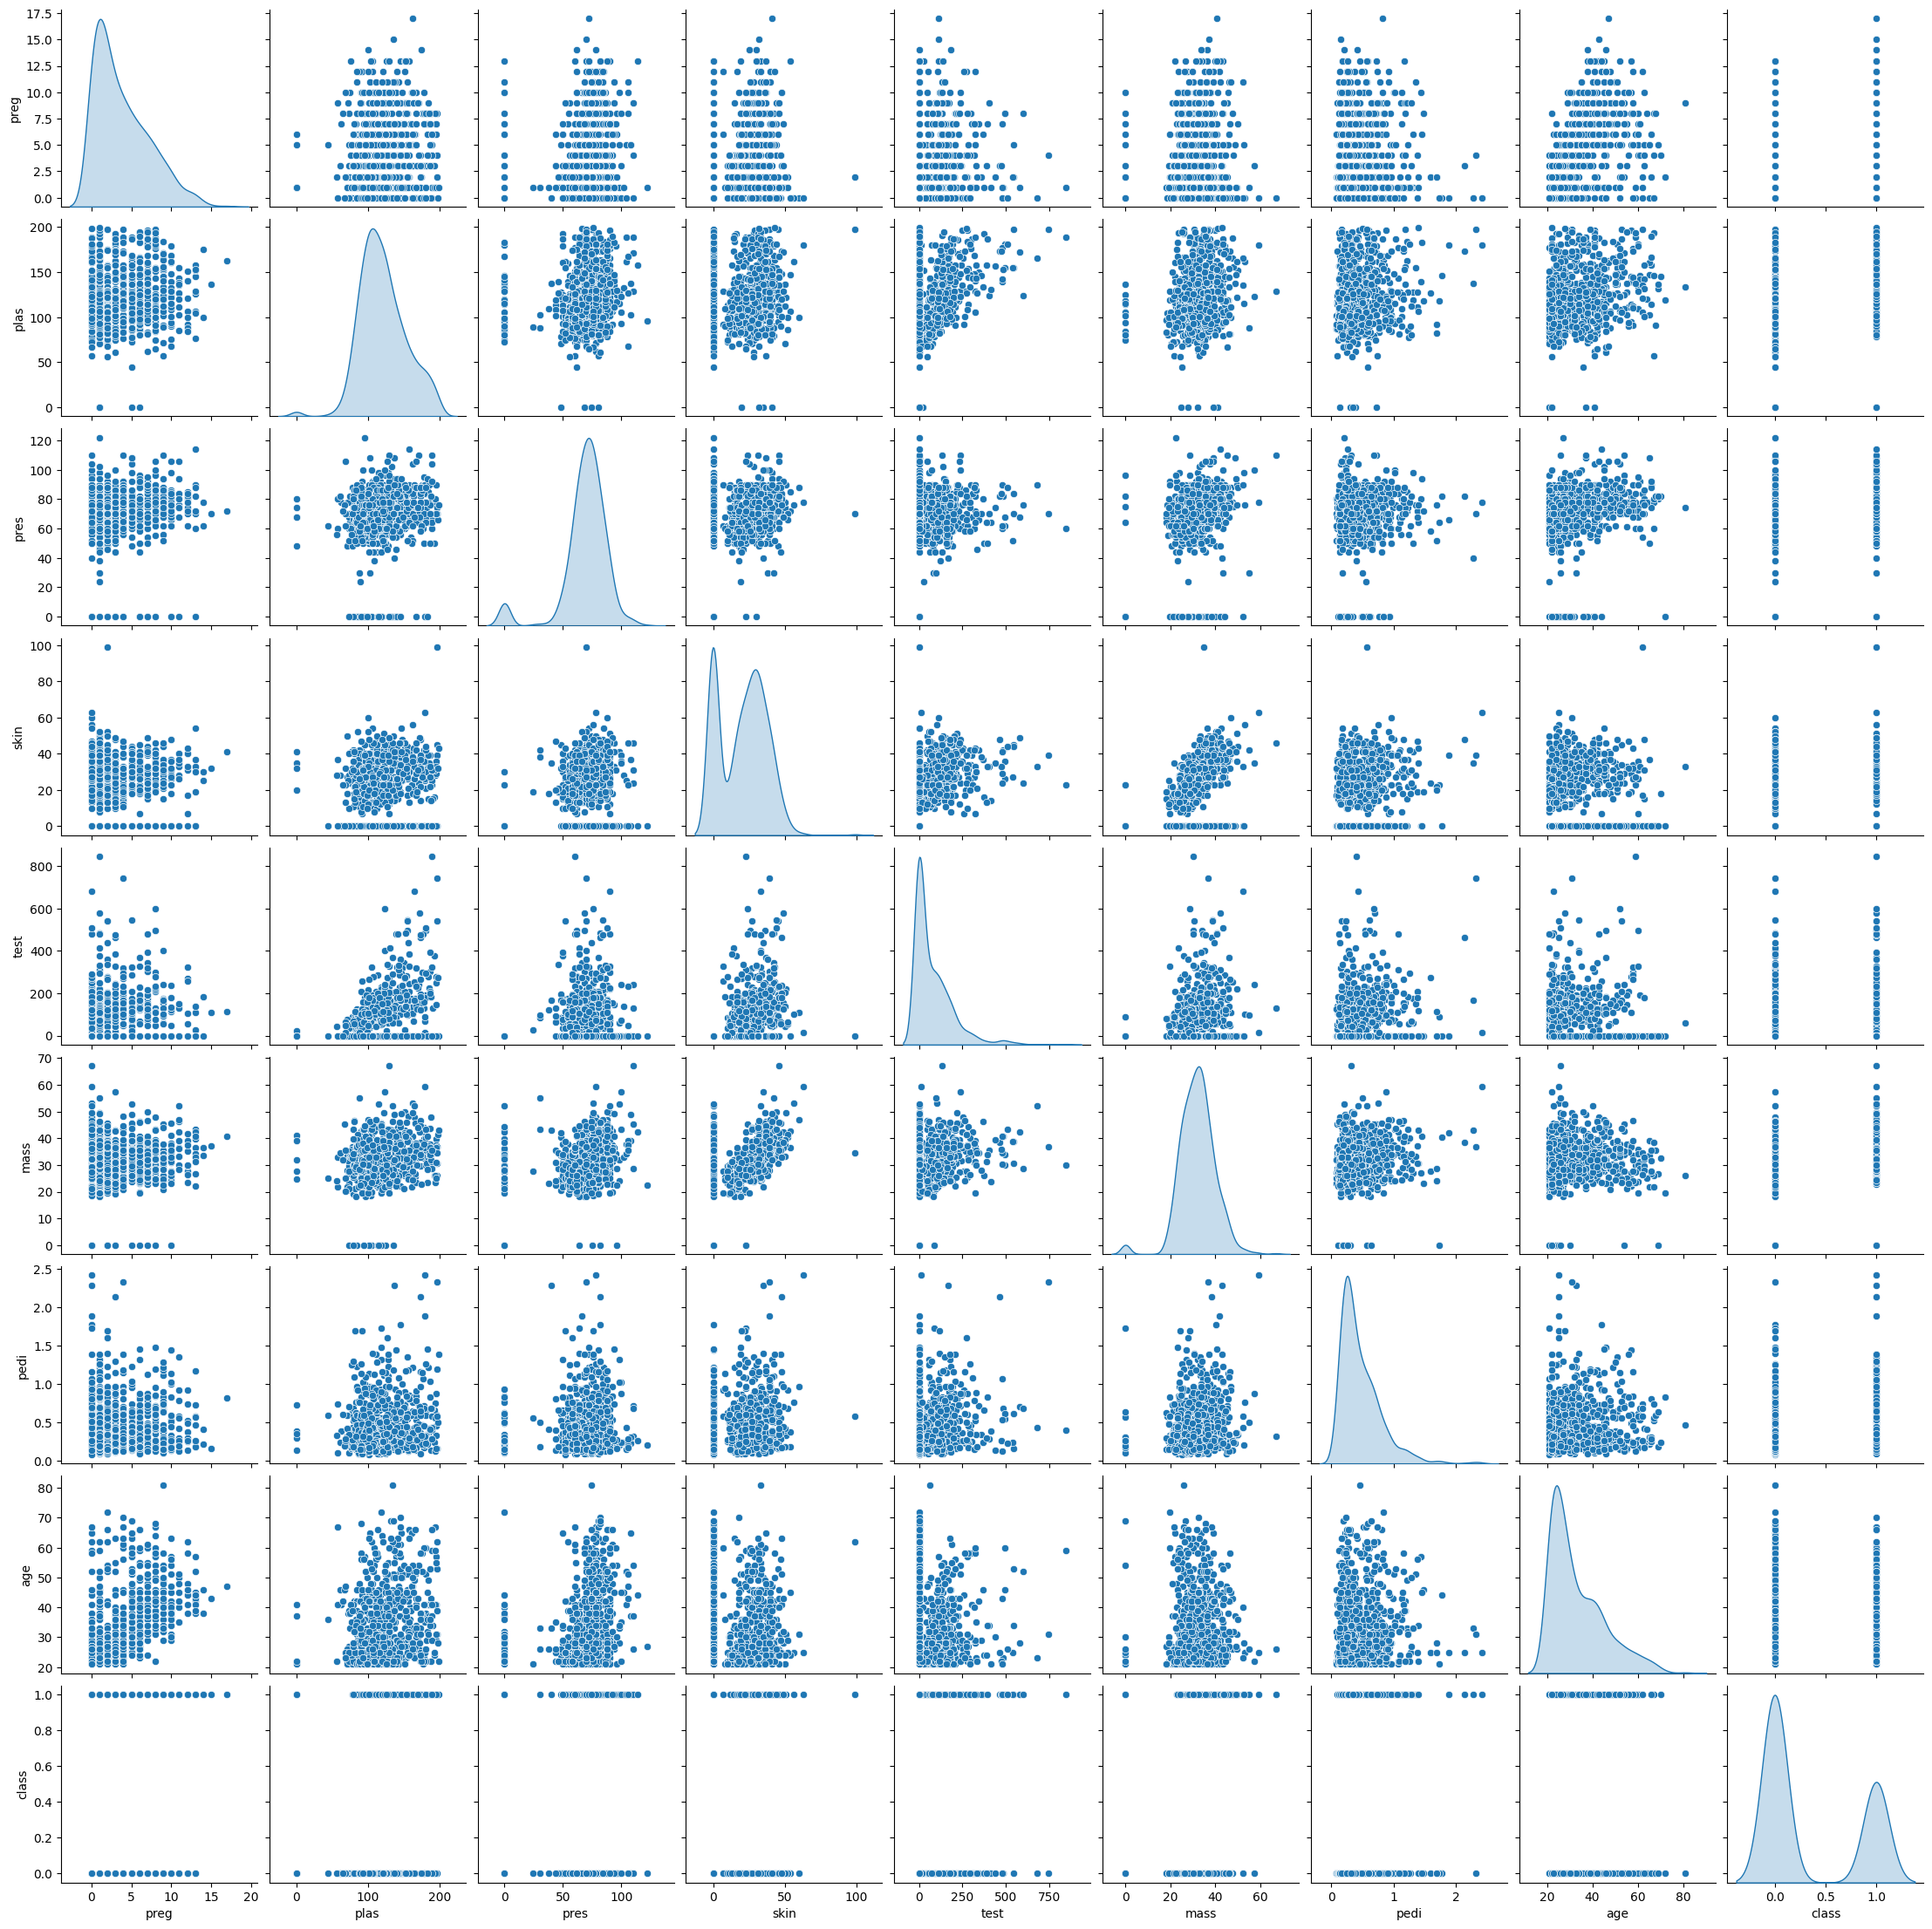

In [9]:
sns.pairplot(dados, diag_kind='kde')
plt.show()

#3° Pré-Processamento dos Dados

In [3]:
# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

In [11]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

## Normalização

In [12]:
# Gerando a nova escala (normalizando os dados)
#scaler = MinMaxScaler(feature_range = (0, 1))
#rescaledX = scaler.fit_transform(X)

In [13]:
#rescaledX

## Padronização

In [14]:
# Gerando o novo padrão
#scaler = StandardScaler().fit(X)
#standardX = scaler.transform(X)

In [15]:
#standardX

#Modelo de validação da máquina preditiva

In [4]:
# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, shuffle=True, random_state = seed)

# 4° Criação da Máquina Preditiva

# <font color='GREY'> Primeira Decision Tree </font>

In [6]:
# Criando o modelo
modeloDC = DecisionTreeClassifier()
#modeloDC.fit(X, Y)

# Definindo os valores que serão utilizados no grid
valores_grid = {'max_features': [3,5,7,9,10], 'max_depth': [2,3,4,5,10,15]}
iterations = 14 #Usado no primeiro modelo

#Criando o grid para testar diferentes combinações de hiperparâmetros
rsearch = RandomizedSearchCV(estimator = modeloDC,
                             param_distributions = valores_grid,
                             n_iter = iterations,
                             random_state = 7)
rsearch.fit(X, Y)

# Cross Validation do modelo sem Random Search e Sem padronozação e normalização
#resultado = cross_val_score(modeloDC, X, Y, cv = kfold)

#Cross Validation do modelo sem Random Search e com normalização
#resultado = cross_val_score(modeloDC, rescaledX, Y, cv = kfold)

#Cross Validation do modelo sem Random Search e com padronização
#resultado = cross_val_score(modeloDC, standardX, Y, cv = kfold)

# Cross Validation com o modelo otimizado
resultado = cross_val_score(rsearch.best_estimator_, X, Y, cv = kfold)
print("Acurácia média obtida durante a validação cruzada: {:.2f}%".format((rsearch.best_score_ * 100)))
print("Melhores Parâmetros do Modelo:\n", rsearch.best_params_)

Acurácia média obtida durante a validação cruzada: 74.88%
Melhores Parâmetros do Modelo:
 {'max_features': 9, 'max_depth': 5}


# <font color='GREY'> Avaliação da Decision Tree </font>

In [7]:
# Print do resultado da acurácia do modelo de Decision Tree
print("Acurácia: {:.2f}%".format(resultado.mean() * 100))

# Avaliação do modelo sem Random Search e sem padronização e normalização. Acurácia: 69.15%
# Avaliação do modelo sem Random Search e COM normalização. Acurácia: 68.37%
# Avaliação do modelo sem Random Search e COM normalização. Acurácia: 69.80%
# Avaliação do modelo COM Random Search: Acurácia: 75.01%%   MELHOR MODELO!
# Acurácia média obtida durante a validação cruzada: 74.88%
# Melhores Parâmetros do Modelo: {'max_features': 9, 'max_depth': 5}


Acurácia: 75.01%


# <font color='GREY'> Segunda Regressão Logística </font>


In [5]:
#Criando o modelo
modeloLR = LogisticRegression()
modeloLR.fit(X, Y)

# Definindo os valores que serão testados
#seed = 7
#iterations = 14

# Definindo os valores que serão testados PRIMEIRO GRID
#valores_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}


#valores_grid = {'penalty': ['l1', 'l2'],
#              'C': loguniform(a=1e-3, b=3),  # Distribuição logarítmica uniforme para C, a and b should be > 0
#              'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs', 'sag'],
#              'class_weight': ['balanced', {0: 0.3, 1: 0.7}],  # Balanceamento de classes
#              'max_iter': randint(100, 1000),  # Número máximo de iterações
#              'tol': uniform(loc=1e-6, scale=1e-3)}  # Tolerância do solver

#rsearch = RandomizedSearchCV(estimator = modeloLR,
#                             param_distributions = valores_grid,
#                             n_iter = iterations,
#                             random_state = seed)
#rsearch.fit(X, Y)

#Cross Validation do modelo sem Random Search e Sem padronozação e normalização
resultado = cross_val_score(modeloLR, X, Y, cv = kfold)

#Cross Validation do modelo sem Random Search e Sem padronozação e normalização
#resultado = cross_val_score(modeloLR, rescaledX, Y, cv = kfold)

#Cross Validation do modelo sem Random Search e Sem padronozação e normalização
#resultado = cross_val_score(modeloLR, standardX, Y, cv = kfold)

# Cross Validation com o modelo otimizado
#resultado = cross_val_score(rsearch.best_estimator_, X, Y, cv = kfold)

#print("Acurácia média obtida durante a validação cruzada: {:.2f}%".format((rsearch.best_score_ * 100)))
#print("Melhores Parâmetros do Modelo:\n", rsearch.best_params_)

# <font color='GREY'> Avaliação da Regressão Logística </font>

In [6]:
# Print do resultado da Acurária da Regressão Logística
print("Acurácia: {:.2f}%".format(resultado.mean() * 100))

# Avaliação do modelo sem Random Search e sem padronização e normalização. Acurácia: 77.86% MELHOR MODELO!
# Avaliação do modelo sem Random Search e COM normalização. Acurácia: 77.48%
# Avaliação do modelo sem Random Search e COM normalização. Acurácia: 77.35%

# Avaliação do modelo COM Random Search: Acurácia (PRIMEIRO MODELO): 76.95%
#Acurácia média obtida durante a validação cruzada: 77.48%
#Melhores Parâmetros do Modelo:{'penalty': 'l2', 'C': 10}


Acurácia: 77.86%


# 5° Avaliação das Máquinas Preditivas



# MESMO UTILIZANDO OS PARâMETROS DEFAULT A O MODELO DE **REGRESSÃO LOGÍSTICA** APRESENTOU **77.86%** DE ACURÁRIA CONTRA O MELHOR RESULTADO DA **DECISION TREE** OTIMIZADA QUE FOI DE **75.01%.**